In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
fifafile= pd.read_csv("fifa21_train.csv")
display (fifafile)
fifafile.shape
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

ID            Name  Age  Nationality                        Club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        BP   Position                               Team & Contract Height  \
0       CM     CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"   
1       ST   ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"   
2      CAM     CAM CF                          Al Hilal 2019 ~ 2022   5'4"   
3      CDM     CDM CM                      Swansea City 2016 ~ 2021  5'10"   
4      CDM     CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"   
...    ...        ...                                           ...    ...   
11696   LB         LB             Jagiellonia Białystok 2018 ~ 2021   6'1"   
11697   GK         GK                      ESTAC Troyes 2019 ~ 2022   6'1"   
11698   RM  LM CAM RM                    CD Antofagasta 2019 ~ 2024   5'6"   
11699   CM        NaN                                 Barnsley 2010   6'2"   
11700  CAM  ST CAM LM                  Portland Timbers 2019 ~ 2020   5'7"   

       Weight  ...   CDM   RDM   RWB    LB   LCB    CB   RCB    RB    GK  OVA  
0      161lbs  ...  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1      159lbs  ...  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2      134lbs  ...  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3      152lbs  ...  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4      150lbs  ...  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  
...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  
11696  168lbs  ...  60+2  60+2  63+2  63+2  61+2  61+2  61+2  63+2  16+2   65  
11697  174lbs  ...  26+2  26+2  25+2  24+2  26+2  26+2  26+2  24+2  69+2   70  
11698  143lbs  ...  44+2  44+2  49+2  45+2  35+2  35+2  35+2  45+2  17+2   67  
11699  179lbs  ...  68+0  68+0  66+0  64+0  60+0  60+0  60+0  64+0  25+0   68  
11700  143lbs  ...  43+2  43+2  46+2  44+2  36+2  36+2  36+2  44+2  15+2   64  

[11701 rows x 101 columns]

In [4]:
def print_full(df):
    import pandas as pd
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_rows')

In [5]:
fifafile =fifafile.drop(['Club','Joined','Loan Date End','A/W','D/W','ID','Age','Position','Nationality','Team & Contract','Height','Weight','foot','Growth','Value','Wage','Release Clause','Contract','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping','Total Stats','Base Stats', "W/F", 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',"SM"], axis=1)


In [5]:
print_full(fifafile.isna().sum())


Name                  0
BP                    0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Marking               0
Standing Tackle       0
Sliding Tackle       41
GK Diving             0
GK Handling           0
GK Kicking            0
GK Positioning        0
GK Reflexes           0
IR                    0
PAC                   0
SHO                   0
PAS                   0
DRI                   0
DEF             

In [6]:
fifafile[fifafile.isna().any(axis=1)]

Name   BP  Crossing  Finishing  Heading Accuracy  \
17          M. Oddo B   CM        85         56                60   
32           L. Muñoz   CB        27         21                53   
44           C. Reyna   CM        60         62                66   
369     Ricardo Bueno   ST        57         61                74   
396             Diego  CAM        81         66                53   
...               ...  ...       ...        ...               ...   
11555        Rodrigão   ST        52         73                82   
11580            Nenê   LW        77         75                66   
11650       J. Koller   ST        57         84                86   
11680     P. Guerrero   ST        67         78                83   
11699  Anderson Silva   CM        64         66                51   

       Short Passing  Volleys  Dribbling  Curve  FK Accuracy  Long Passing  \
17                80     61.0         74   85.0           82            80   
32                50      NaN         41    NaN           32            35   
44                83      NaN         66    NaN           74            74   
369               54     57.0         67   59.0           53            51   
396               83     80.0         84   85.0           85            82   
...              ...      ...        ...    ...          ...           ...   
11555             48      NaN         63    NaN           42            35   
11580             80     75.0         79   82.0           81            76   
11650             75      NaN         56    NaN           42            43   
11680             72     76.0         78   65.0           31            63   
11699             73      NaN         74    NaN           63            72   

       Ball Control  Acceleration  Sprint Speed  Agility  Reactions  Balance  \
17               76            54            54     66.0         74     64.0   
32               46            65            61      NaN         62      NaN   
44               79            65            64      NaN         60      NaN   
369              66            72            72     67.0         65     66.0   
396              83            75            74     81.0         71     84.0   
...             ...           ...           ...      ...        ...      ...   
11555            68            72            72      NaN         66      NaN   
11580            78            67            69     77.0         71     74.0   
11650            79            60            67      NaN         81      NaN   
11680            83            66            69     63.0         72     65.0   
11699            75            71            72      NaN         55      NaN   

       Shot Power  Jumping  Stamina  Strength  Long Shots  Aggression  \
17             78     58.0       52        66          74          60   
32             27      NaN       50        53          21          69   
44             73      NaN       80        72          69          69   
369            65     84.0       49        59          61          49   
396            74     75.0       65        61          75          61   
...           ...      ...      ...       ...         ...         ...   
11555          74      NaN       72        76          67          67   
11580          72     62.0       58        65          78          65   
11650          87      NaN       68        94          75          69   
11680          77     80.0       51        84          66          70   
11699          61      NaN       71        64          62          64   

       Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
17              68.0         70.0    62.0         88        NaN       70   
32              42.0         39.0     NaN         40        NaN       61   
44              81.0         70.0     NaN         78        NaN       71   
369             37.0         69.0    57.0         51        NaN       20   
396             34.0         70.0

In [7]:
fifafile_nan = pd.DataFrame(fifafile,columns=['Volleys','Curve',"Jumping","Balance", "Agility","Vision","Sliding Tackle" , "Interceptions"])

nan_values = fifafile_nan[fifafile_nan.isnull().any(axis=1)]

display (nan_values)

Volleys  Curve  Jumping  Balance  Agility  Vision  Sliding Tackle  \
32         NaN    NaN      NaN      NaN      NaN     NaN             NaN   
44         NaN    NaN      NaN      NaN      NaN     NaN             NaN   
470        NaN    NaN      NaN      NaN      NaN     NaN             NaN   
664        NaN    NaN      NaN      NaN      NaN     NaN             NaN   
928        NaN    NaN      NaN      NaN      NaN     NaN             NaN   
1095       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
1711       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
1778       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
1925       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
2018       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
2535       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
2623       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
2733       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
2825       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
3079       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
3527       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
3809       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
3982       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
4622       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
5231       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
5476       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
5778       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
5818       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
6669       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
7229       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
7292       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
8689       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
8765       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
8864       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
9077       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
9404       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
9502       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
9590       NaN    NaN      NaN      NaN      NaN     NaN             NaN   
10073      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
10564      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11033      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11065      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11176      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11555      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11650      NaN    NaN      NaN      NaN      NaN     NaN             NaN   
11699      NaN    NaN      NaN      NaN      NaN     NaN             NaN   

       Interceptions  
32              42.0  
44              81.0  
470             82.0  
664             90.0  
928             53.0  
1095            39.0  
1711            71.0  
1778             NaN  
1925            24.0  
2018            75.0  
2535            46.0  
2623            70.0  
2733            75.0  
2825             NaN  
3079            86.0  
3527            85.0  
3809            78.0  
3982             NaN  
4622            43.0  
5231            50.0  
5476             NaN  
5778            77.0  
5818            91.0  
6669             NaN  
7229             NaN  
7292             NaN  
8689            41.0  
8765            90.0  
8864            59.0  
9077            37.0  
9404            95.0  
9502            50.0  
9590            33.0  
10073           68.0  
10564    

In [8]:
fifafile = fifafile[fifafile['Volleys'].isna()==False]

In [9]:
mean_composure = fifafile["Composure"].mean()
fifafile["Composure"] =fifafile["Composure"].fillna(mean_composure)

In [10]:
print_full(fifafile.isna().sum())

Name                0
BP                  0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
IR                  0
PAC                 0
SHO                 0
PAS                 0
DRI                 0
DEF                 0
PHY                 0
OVA                 0
dtype: int64


In [11]:
fifafile['IR']=fifafile['IR'].str.replace('★','') #This for replace the star with nothing

In [12]:
fifafile.head()

Name   BP  Crossing  Finishing  Heading Accuracy  Short Passing  \
0      A. Pasche   CM        54         47                43             70   
1  Alan Carvalho   ST        66         79                76             68   
2    S. Giovinco  CAM        73         76                34             78   
3       J. Evans  CDM        44         42                58             62   
4     Y. Demoncy  CDM        49         37                61             68   

   Volleys  Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  \
0     44.0         61   44.0           55            63            63   
1     76.0         83   78.0           72            63            79   
2     75.0         85   89.0           91            74            85   
3     36.0         54   41.0           46            57            61   
4     34.0         64   44.0           45            61            66   

   Acceleration  Sprint Speed  Agility  Reactions  Balance  Shot Power  \
0            64            73     61.0         66     82.0          62   
1            83            83     88.0         75     75.0          74   
2            84            76     93.0         78     93.0          79   
3            54            59     59.0         55     55.0          57   
4            66            66     61.0         62     69.0          61   

   Jumping  Stamina  Strength  Long Shots  Aggression  Interceptions  \
0     73.0       71        55          45          54           52.0   
1     81.0       75        74          68          54           33.0   
2     34.0       75        42          78          75           26.0   
3     60.0       64        58          38          61           57.0   
4     34.0       81        61          43          66           60.0   

   Positioning  Vision  Penalties  Composure  Marking  Standing Tackle  \
0         62.0    68.0         54       54.0       49               56   
1         78.0    72.0         76       70.0       35               20   
2         80.0    78.0         73       82.0       23               29   
3         31.0    54.0         54       48.0       55               58   
4         55.0    64.0         49       58.0       58               61   

   Sliding Tackle  GK Diving  GK Handling  GK Kicking  GK Positioning  \
0            43.0          7           12          14               9   
1            22.0         11            7          14               7   
2            28.0          6            3           6               3   
3            55.0          8            9           6               7   
4            66.0          8            9          15               5   

   GK Reflexes  IR  PAC  SHO  PAS  DRI  DEF  PHY  OVA  
0            6  1    69   51   63   63   51   60   64  
1           16  2    83   75   68   82   33   71   77  
2            3  2    80   77   78   86   27   56   80  
3           12  1    57   44   54   57   57   60   59  
4           15  1    66   44   60   64   60   66   65

In [13]:
numerical = fifafile.select_dtypes(include = np.number)
categorical = fifafile.select_dtypes(include = object)

In [14]:
fifafile['IR'] = pd.to_numeric(categorical['IR'],errors='coerce')
categorical = fifafile.select_dtypes(include = object)


In [15]:
numerical.columns

Index(['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA'],
      dtype='object')

In [16]:
categorical.columns

Index(['Name', 'BP'], dtype='object')

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


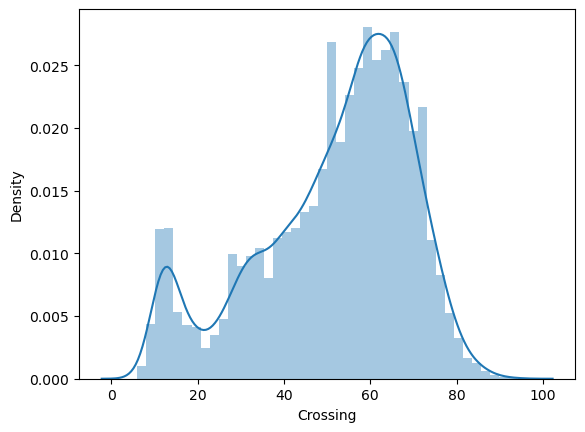

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


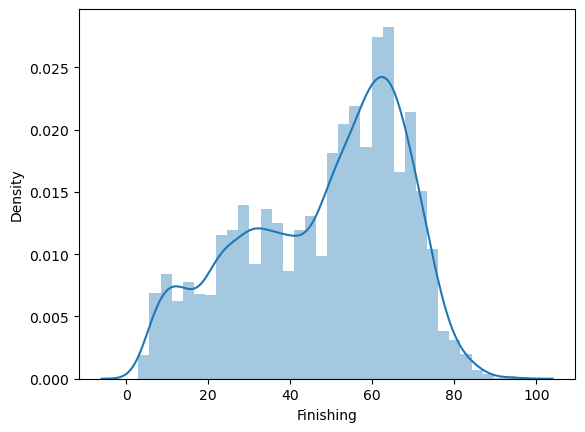

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


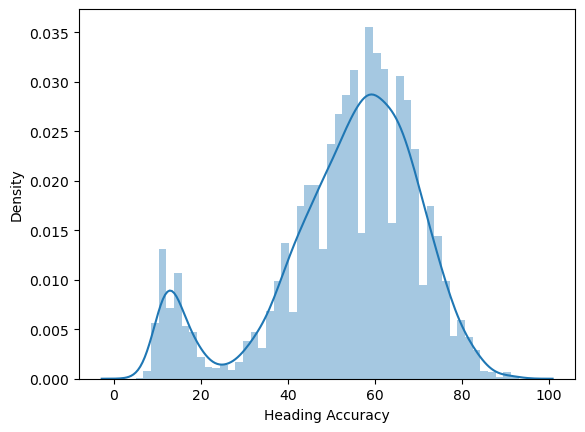

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


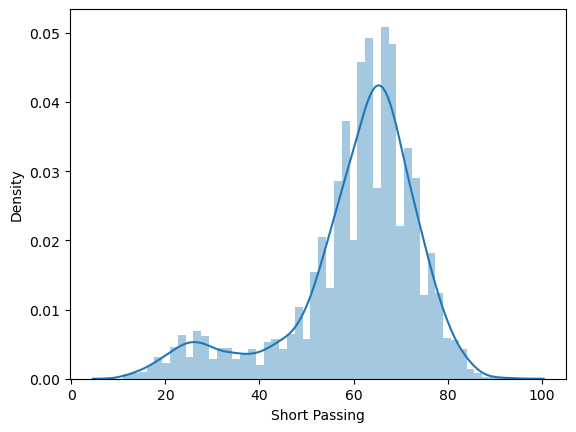

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


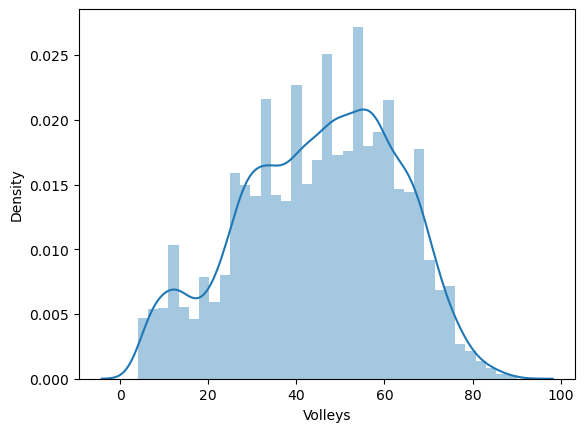

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


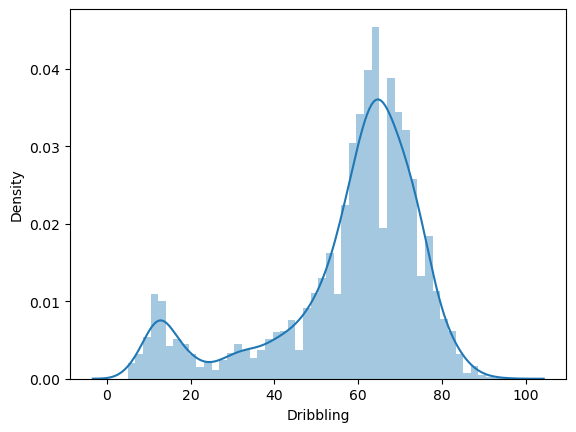

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


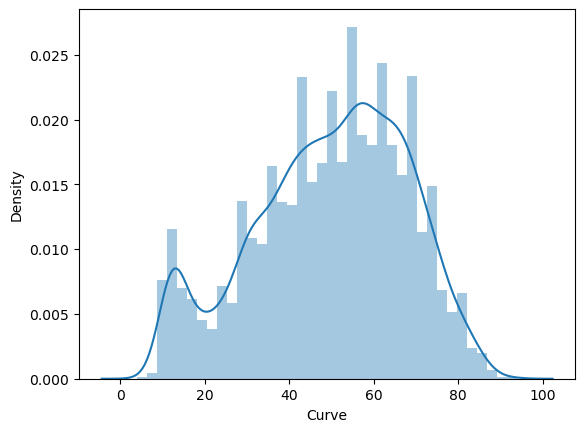

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


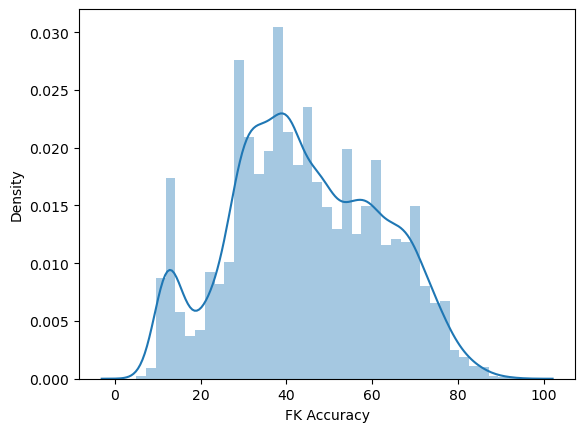

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


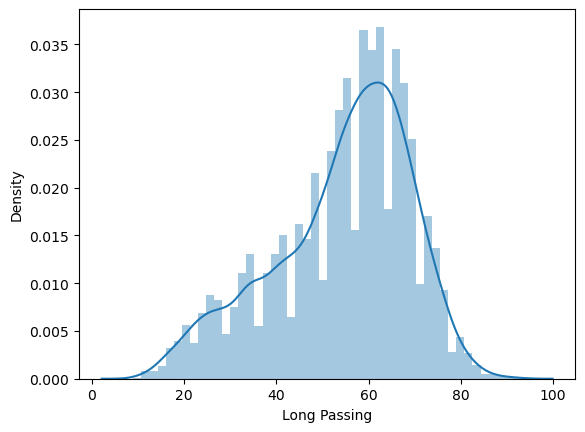

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


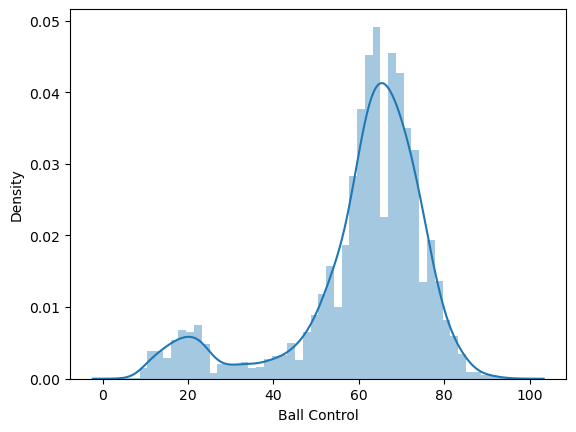

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


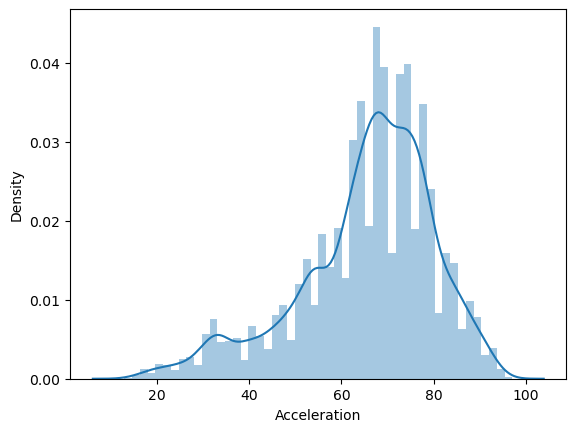

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


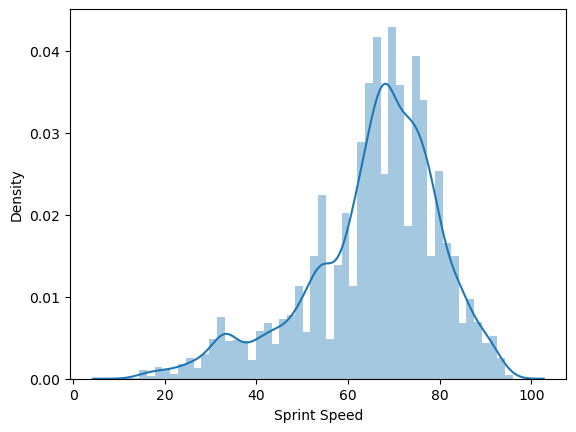

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


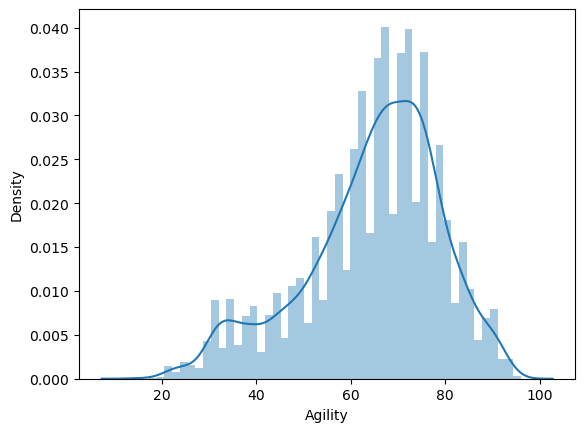

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


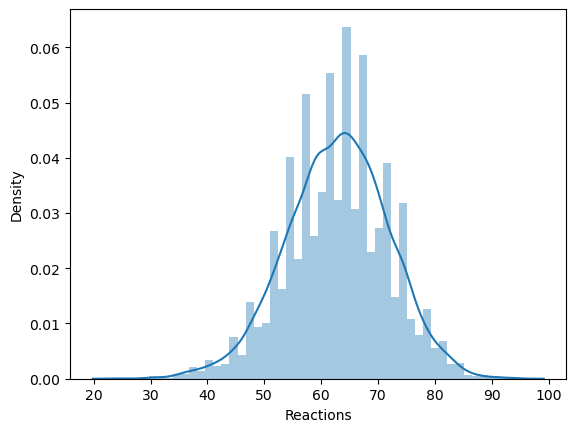

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


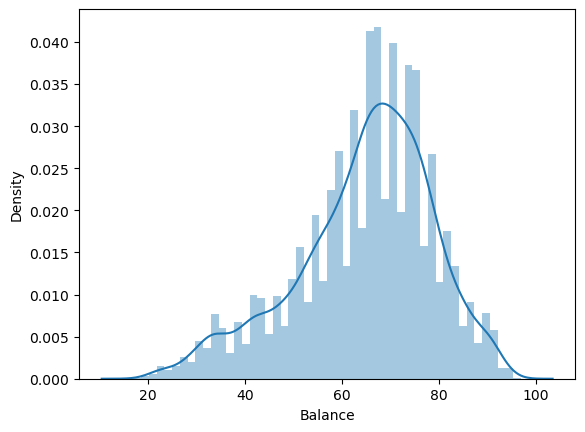

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


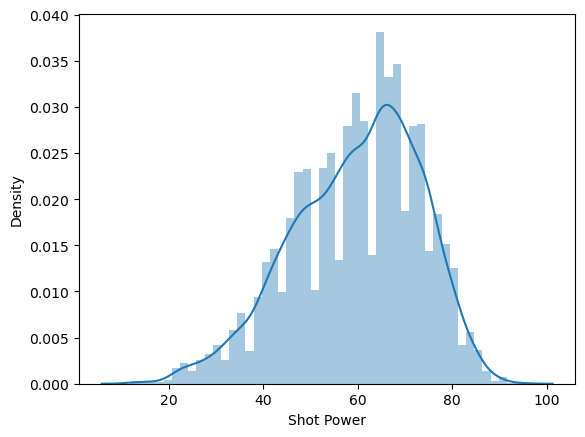

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


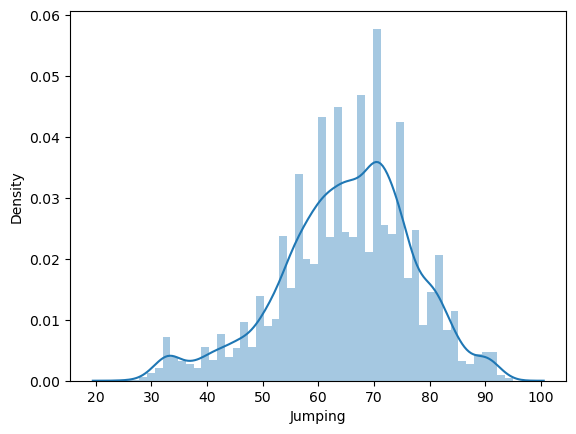

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


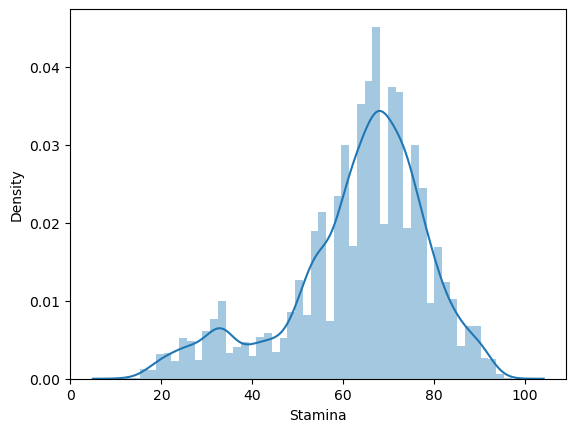

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


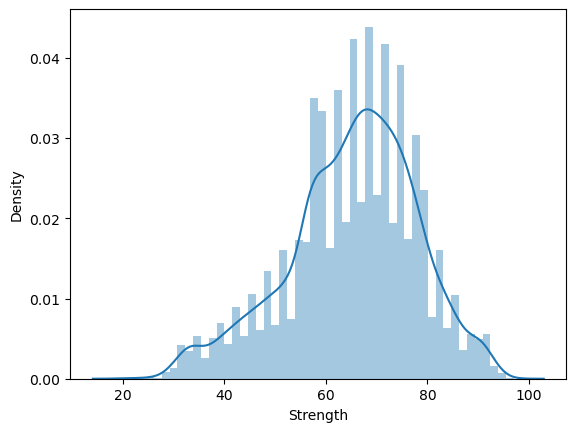

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


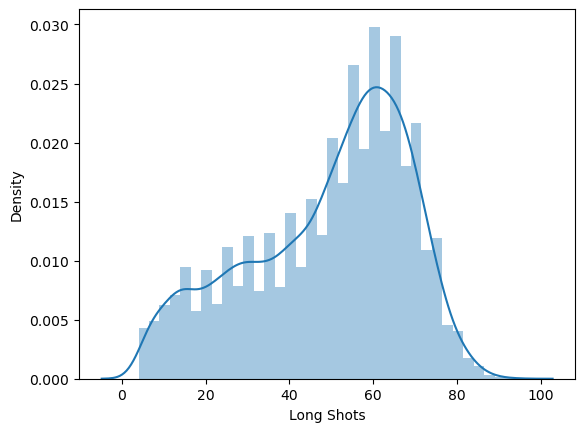

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


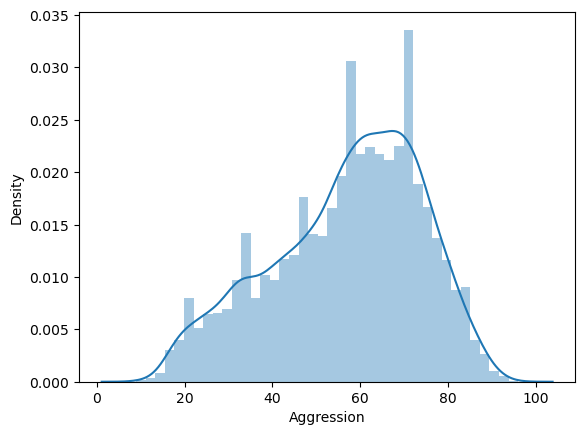

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


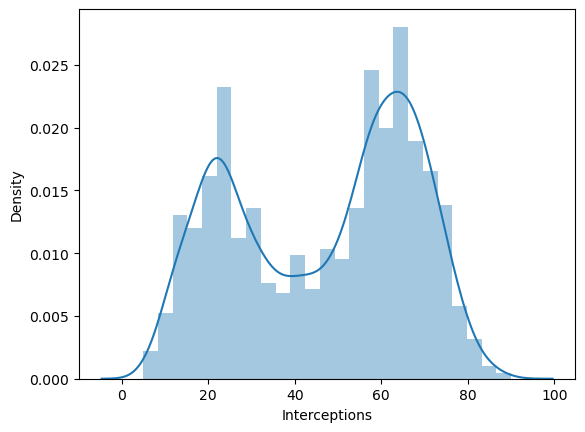

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


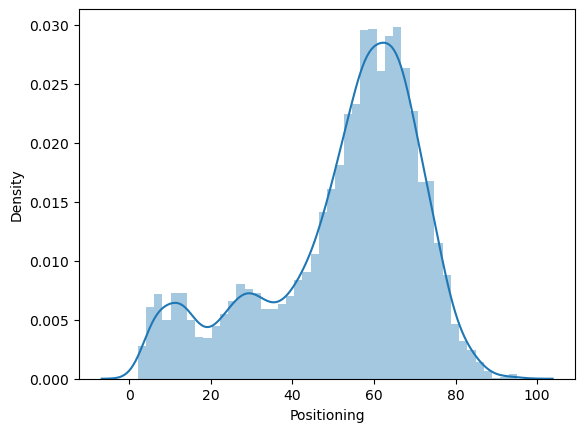

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


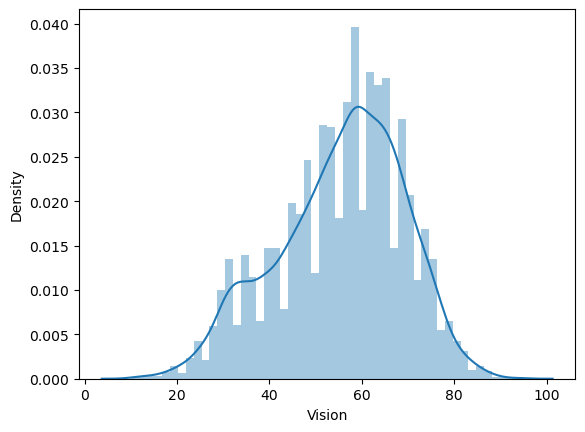

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


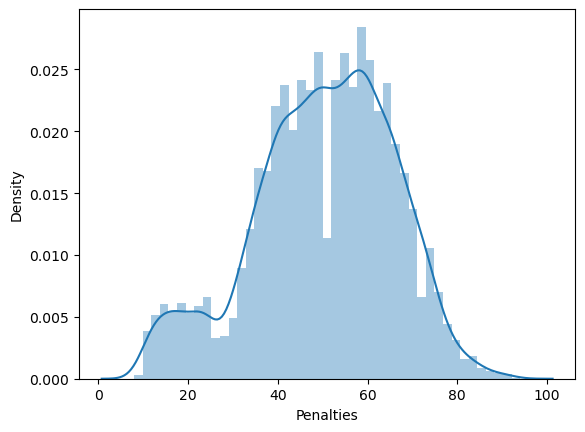

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


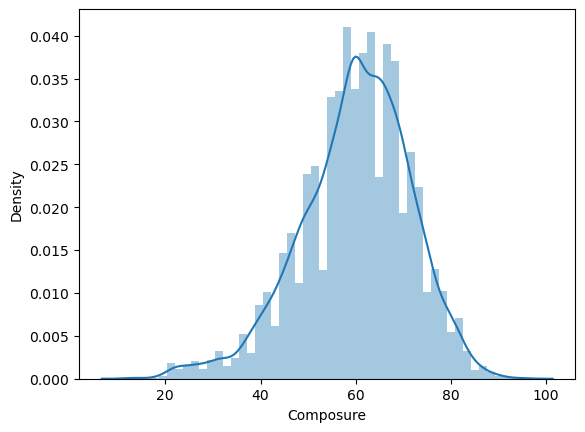

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


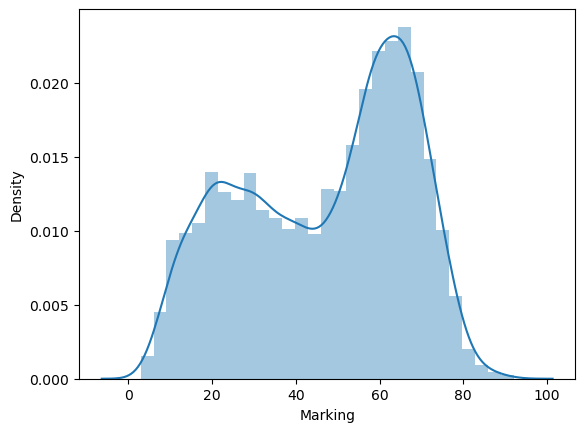

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


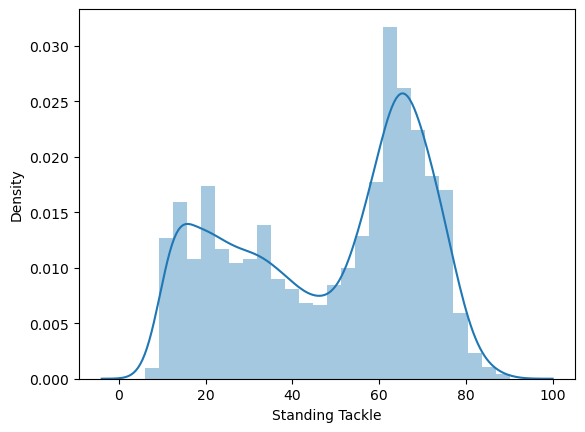

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


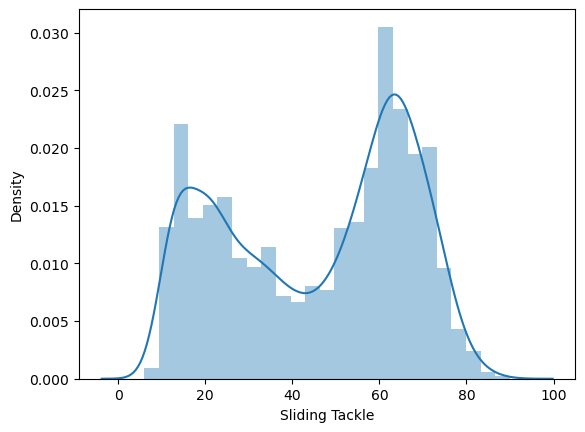

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


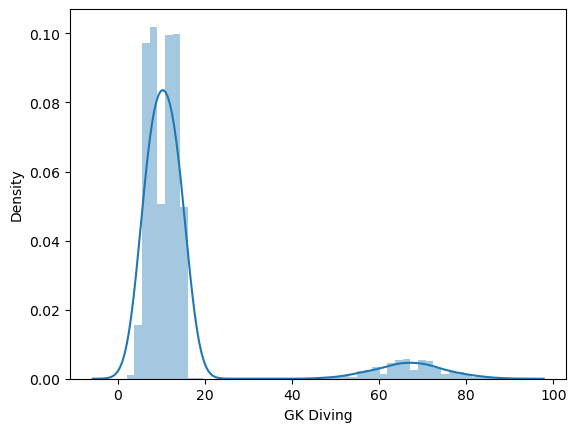

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


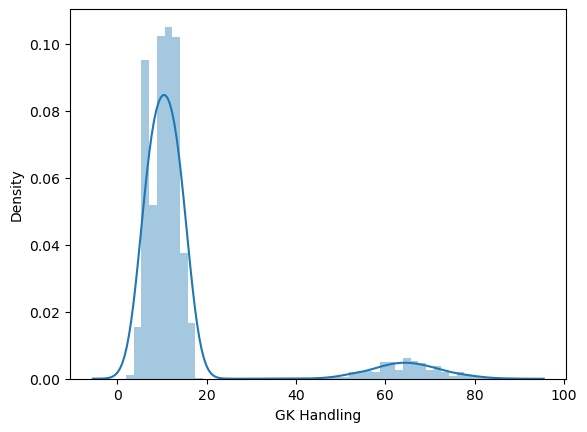

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


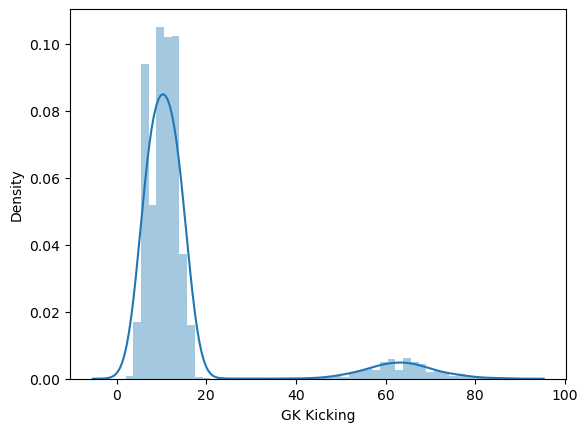

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


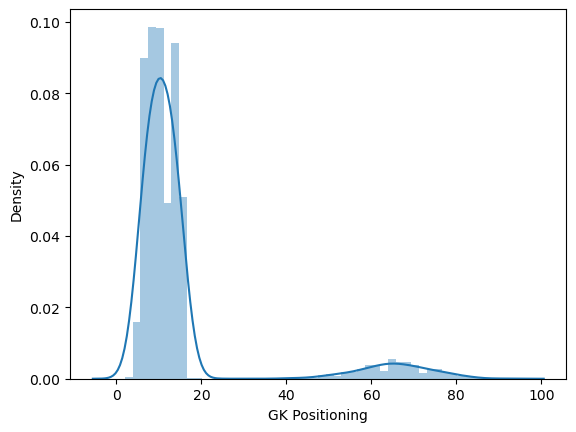

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


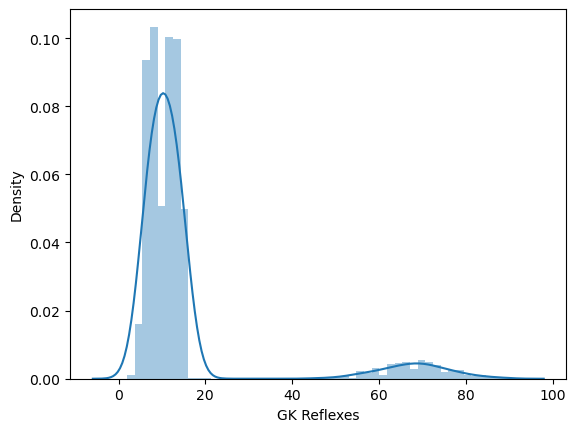

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


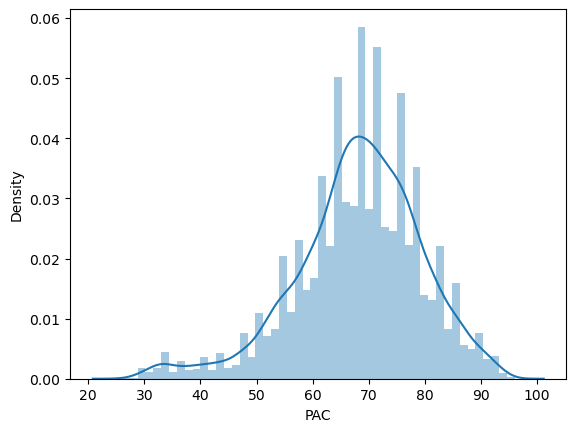

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


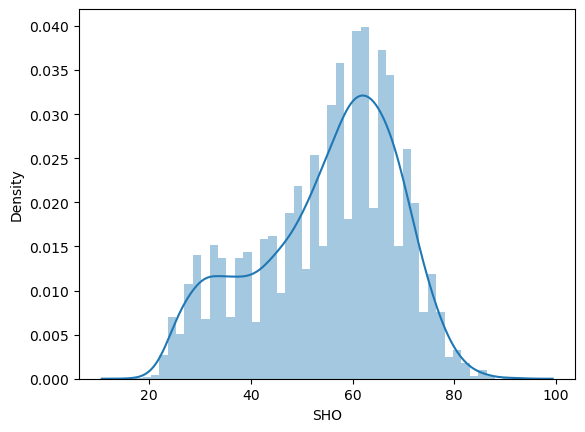

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


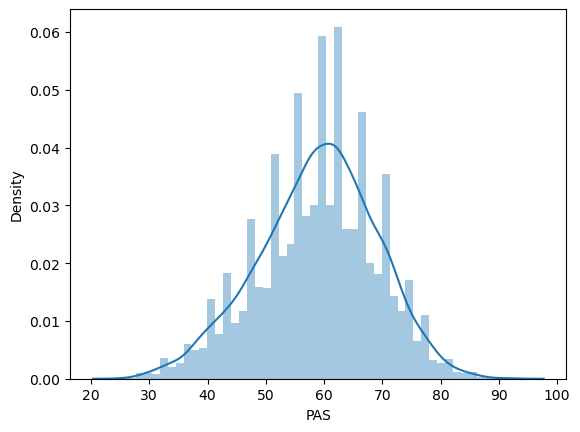

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


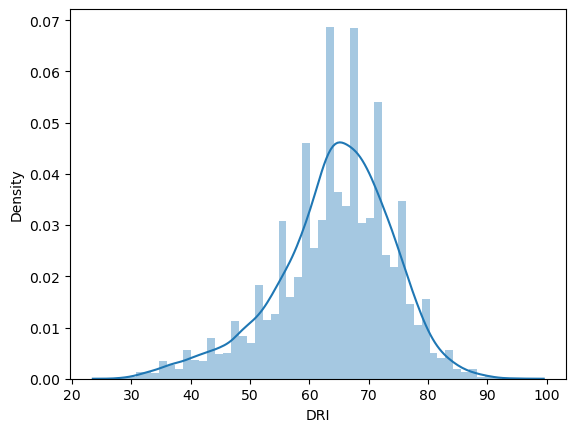

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


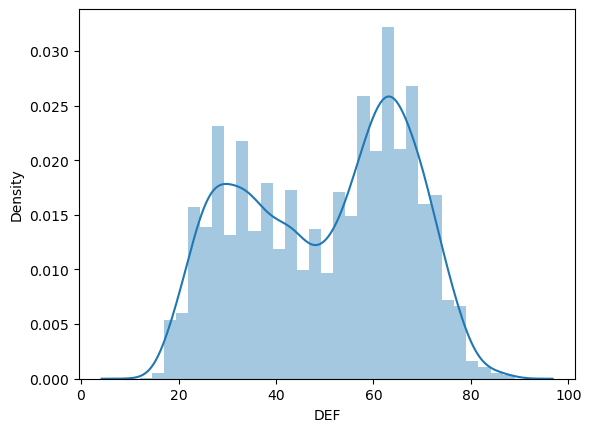

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


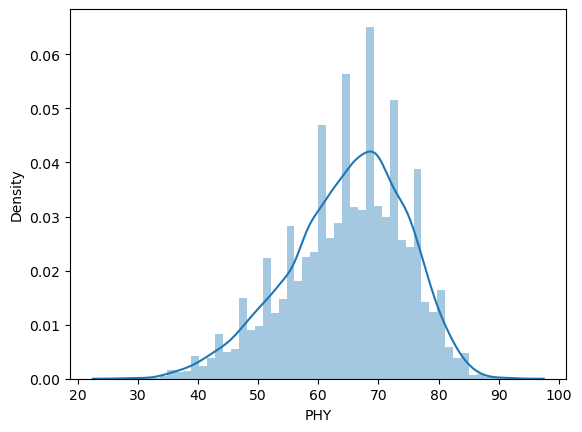

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


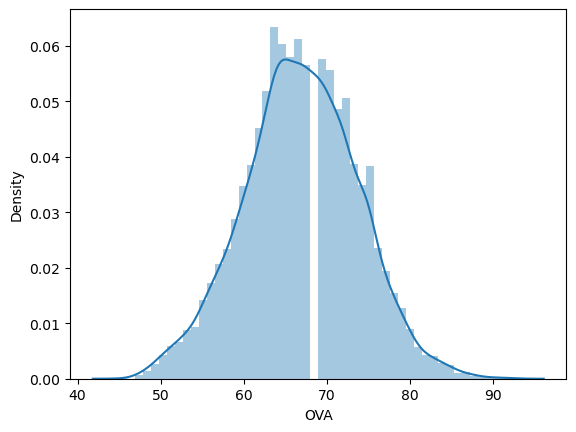

In [17]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

In [18]:
y = numerical['OVA']
X = numerical.drop(['OVA'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = categorical

In [19]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(11660, 40)


In [20]:
X_cat.shape

(11660, 2)

In [21]:
y.head()

0    64
1    77
2    80
3    59
4    65
Name: OVA, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9328, 40)
(2332, 40)
(9328,)
(2332,)


In [24]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.88922428363505

In [26]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8967374788789562

# For validation of new dataset which is not in the model 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
soccer_validation = pd.read_csv("fifa21_validate.csv")

In [29]:
def clean_data(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    # I find this OVA calculator: https://sofifa.com/calculator?r=210056&set=true. So columns that I maintain are "Name" and "BP" to use them as a filter. Moreover, I keep the columns that shows the link. 
    df =df.drop(['Club','Joined','Loan Date End','A/W','D/W','ID','Age','Position','Nationality','Team & Contract','Height','Weight','foot','Growth','Value','Wage','Release Clause','Contract','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping','Total Stats','Base Stats', "W/F", 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',"SM","BP","Name"], axis=1)
    # Drop some NaN values
    df = df[df['Volleys'].isna()==False]
    # In this case I decided to complete them with the mean. 
    mean_composure = df["Composure"].mean()
    df["Composure"] =df["Composure"].fillna(mean_composure)
    df['IR']=df['IR'].str.replace('★','') #This for replace the star with nothing
    df['IR'] = pd.to_numeric(df['IR'],errors='coerce') # It was string so I convert to numerical
    # Separate categorical and numerical columns
    numerical = df.select_dtypes(include = np.number)
    categorical = df.select_dtypes(include = object)
    return df, numerical, categorical
soccer_validation, numerical, categorical = clean_data(soccer_validation)
soccer_validation

Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  \
0           47         21                62             60     40.0   
1           62         60                44             62     70.0   
2            7          5                11             21      4.0   
3           38         31                55             59     32.0   
4           57         59                45             78     56.0   
5           49         55                50             55     33.0   
6           55         25                54             51     25.0   
7           10          9                11             21      7.0   
8           28         59                46             53     44.0   
9           60         60                42             67     64.0   
10          66         41                58             62     52.0   
11          40         40                71             64     34.0   
12          43         31                72             66     20.0   
13          59         50                73             61     63.0   
14          71         63                55             67     59.0   
15          65         58                63             75     58.0   
16          18         13                39             24     15.0   
17          73         35                58             68     24.0   
18          57         58                43             61     54.0   
19          45         46                75             67     49.0   
20          53         32                72             60     35.0   
21          48         46                56             65     41.0   
22          50         21                48             52     29.0   
23          62         57                44             49     51.0   
24          79         58                54             75     75.0   
25          23         27                60             59     20.0   
26          61         58                58             63     56.0   
27           6          7                 8             23      9.0   
28          55         41                63             58     49.0   
29          45         75                72             62     66.0   
30          56         42                76             77     43.0   
31          61         29                53             58     25.0   
32          13          7                11             17      6.0   
33          58         57                38             63     45.0   
34          40         33                62             56     23.0   
35          14          7                10             18      7.0   
36          67         55                62             73     57.0   
37          66         69                60             64     50.0   
38          38         57                59             60     49.0   
39           9         11                14             25      7.0   
40          55         57                55             67     57.0   
41          72         51                49             70     59.0   
42          20         28                81             54     23.0   
43          79         57                60             82     76.0   
44          45         38                54             64     33.0   
45          62         56                47             61     53.0   
46          69         69                72             78     69.0   
47          62         62                55             62     65.0   
48          75         44                78             78     54.0   
49          66         61                43             65     68.0   
50          45         69                67             66     68.0   
51          58         49                31             64     46.0   
52          39         77                78             65     73.0   
53          59         60                60             73     72.0   
54          60         62                51             73     58.0   
55          52         48     

In [30]:
soccer_validation.head(4)

Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  \
0        47         21                62             60     40.0         44   
1        62         60                44             62     70.0         76   
2         7          5                11             21      4.0          6   
3        38         31                55             59     32.0         51   

   Curve  FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0   43.0           36            51            54            60            68   
1   68.0           56            60            70            77            72   
2    8.0            8            20            10            28            25   
3   34.0           38            47            54            59            58   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0     63.0         63     49.0          48     77.0       51        87   
1     83.0         64     79.0          76     62.0       63        47   
2     33.0         41     38.0          40     49.0       22        54   
3     56.0         48     54.0          48     48.0       60        58   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          25          68           62.0         38.0    39.0         39   
1          75          72           26.0         64.0    64.0         60   
2           6          20            9.0          7.0    26.0         14   
3          28          61           55.0         33.0    40.0         41   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0       49.0       68               67            65.0         11   
1       65.0       19               23            19.0         14   
2       31.0        8                9            10.0         56   
3       59.0       53               52            54.0          7   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  IR  PAC  SHO  PAS  \
0            8          15              13            9   1   64   30   50   
1           13           9               9            8   1   74   67   62   
2           52          53              53           55   1   56   52   53   
3            5          13               5            6   1   58   34   47   

   DRI  DEF  PHY  OVA  
0   50   66   74   67  
1   74   24   57   68  
2   55   26   53   54  
3   52   53   59   55

In [31]:
numerical.head(4)

Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  \
0        47         21                62             60     40.0         44   
1        62         60                44             62     70.0         76   
2         7          5                11             21      4.0          6   
3        38         31                55             59     32.0         51   

   Curve  FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0   43.0           36            51            54            60            68   
1   68.0           56            60            70            77            72   
2    8.0            8            20            10            28            25   
3   34.0           38            47            54            59            58   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0     63.0         63     49.0          48     77.0       51        87   
1     83.0         64     79.0          76     62.0       63        47   
2     33.0         41     38.0          40     49.0       22        54   
3     56.0         48     54.0          48     48.0       60        58   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          25          68           62.0         38.0    39.0         39   
1          75          72           26.0         64.0    64.0         60   
2           6          20            9.0          7.0    26.0         14   
3          28          61           55.0         33.0    40.0         41   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0       49.0       68               67            65.0         11   
1       65.0       19               23            19.0         14   
2       31.0        8                9            10.0         56   
3       59.0       53               52            54.0          7   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  IR  PAC  SHO  PAS  \
0            8          15              13            9   1   64   30   50   
1           13           9               9            8   1   74   67   62   
2           52          53              53           55   1   56   52   53   
3            5          13               5            6   1   58   34   47   

   DRI  DEF  PHY  OVA  
0   50   66   74   67  
1   74   24   57   68  
2   55   26   53   54  
3   52   53   59   55

In [32]:
# Data does not have categorical columns so discontinue
categorical.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [8]:
y = numerical['OVA']
X = numerical.drop(['OVA'], axis=1)
X_num = X.select_dtypes(include = np.number)

NameError: name 'numerical' is not defined

In [6]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

NameError: name 'X_num' is not defined